# <b>Stock Market Analysis and Forecasting 


Import Libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
# for visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
# To remove import errors of pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like

In [3]:
#for time stamps
from datetime import datetime
#for reading stock data from IEX
import pandas_datareader as web
#for division
from __future__ import division
import yfinance as yf
from pandas_datareader import data as pdr

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#setting up Start and End times for data
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For-loop for grabing iex finance data and setting as a dataframe

for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)
    #globals is to make the values as global values/ something like to keep(copy) them permanent in dataframe

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


in iex apple is coded as AAPL so we need to code it in 'AAPL'

In [6]:
company_list = [AAPL,GOOG,MSFT,AMZN]
company_name = ["Apple","google","microsoft","amazon"]
for company,company_name1 in zip(company_list,company_name):
    company["company_name"] = company_name1
# zip is to combine or add company name to company list
#AAPL GOOG etc in company list are stock files not just name, for better understanding use the code below
# it is same as writing AAPL["company_name"]= "Apple"
#print(company_list)    

In [7]:
df = pd.concat(company_list,axis=0)
#concating all company list in a single data frame

#replace AAPL with GOOG MSFT AMZN in the below

In [1]:
AAPL.head()

NameError: name 'AAPL' is not defined

In [9]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,188.259087,190.038413,186.676270,188.441310,187.879043,6.045382e+07
std,16.789013,17.091535,16.409584,16.788408,16.927242,2.476485e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.599743,4.692190e+07
50%,184.974998,186.485001,183.469994,185.089996,184.507912,5.377700e+07
75%,194.217499,195.322506,192.985001,194.064999,193.460892,6.604168e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-16 to 2024-08-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
AAPL.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

## Data Visualization


This has nothing much to do with creating model, its only analysis

Ploting the close values of a company

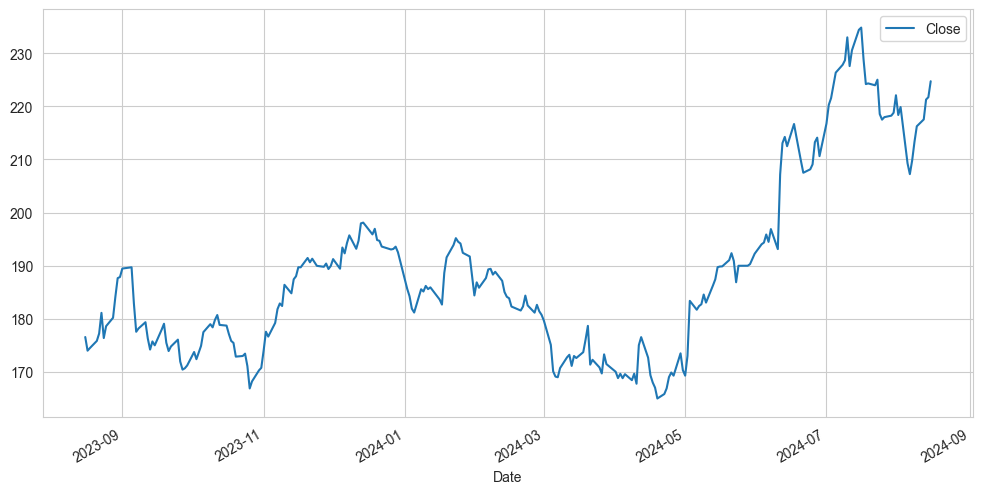

In [12]:
AAPL['Close'].plot(legend = True,figsize = (12,6))
plt.show()

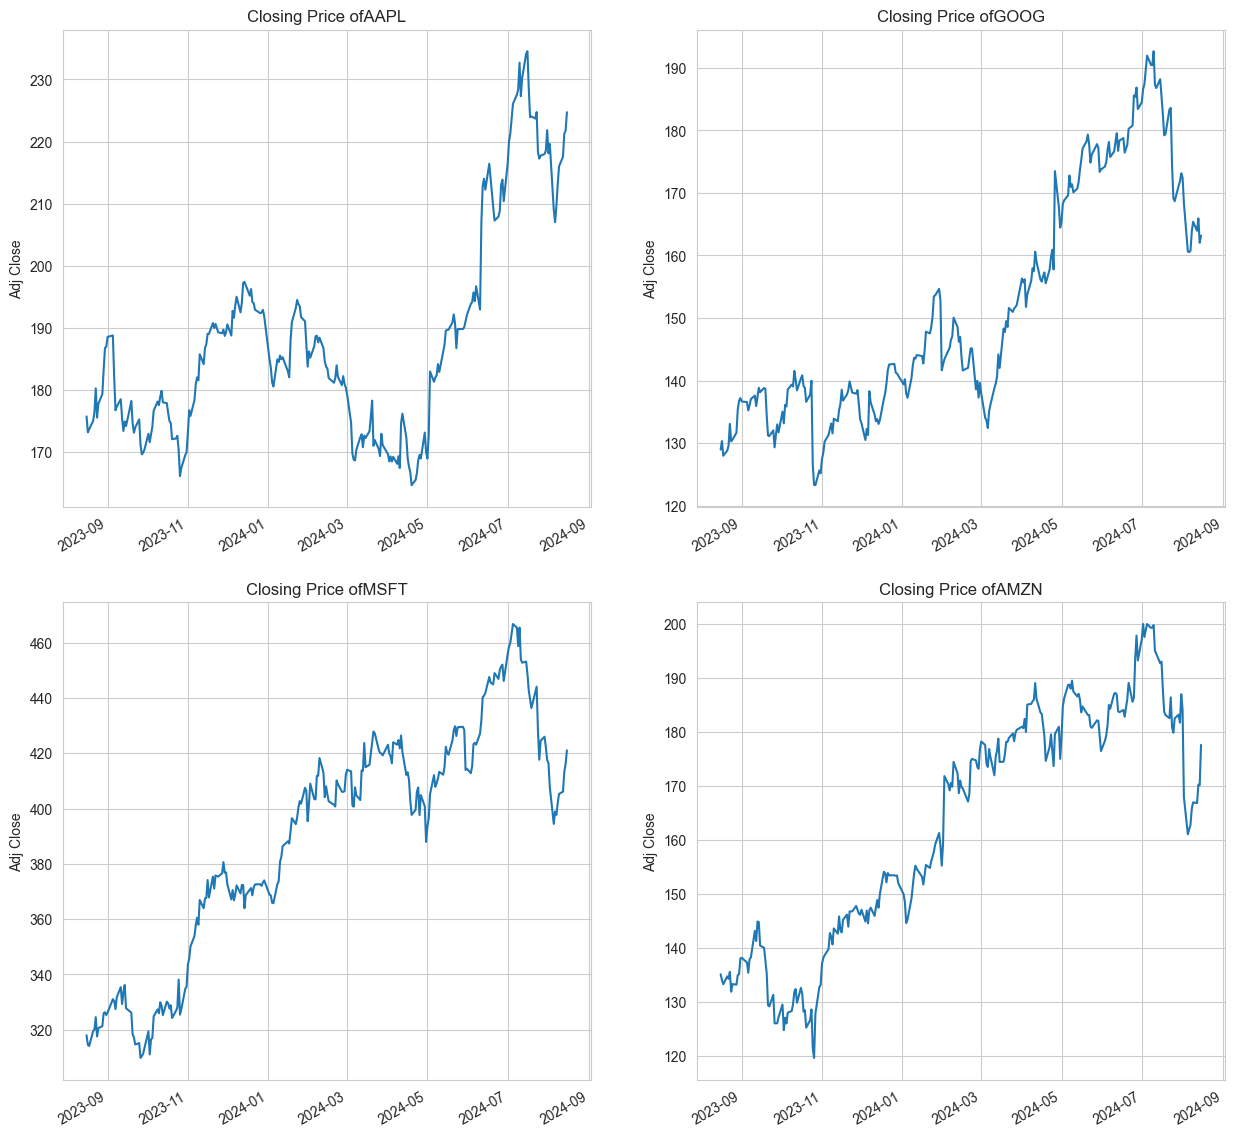

In [13]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom= 1.2)

for i, company in enumerate(company_list,1): #gives: 1 AAPL etc
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of{tech_list[i-1]}") # -1 because we started indexing from 1

Volume of sales

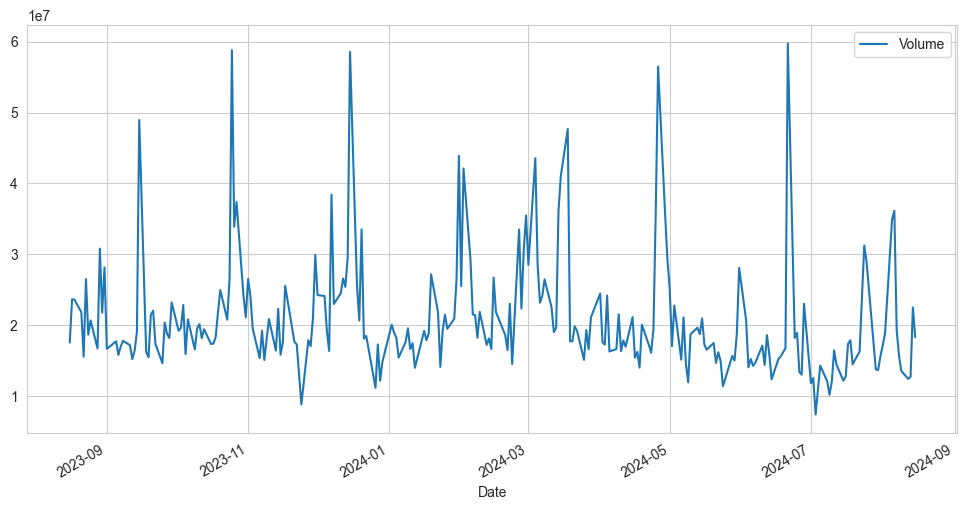

In [14]:
GOOG['Volume'].plot(legend = True,figsize = (12,6))
plt.show()

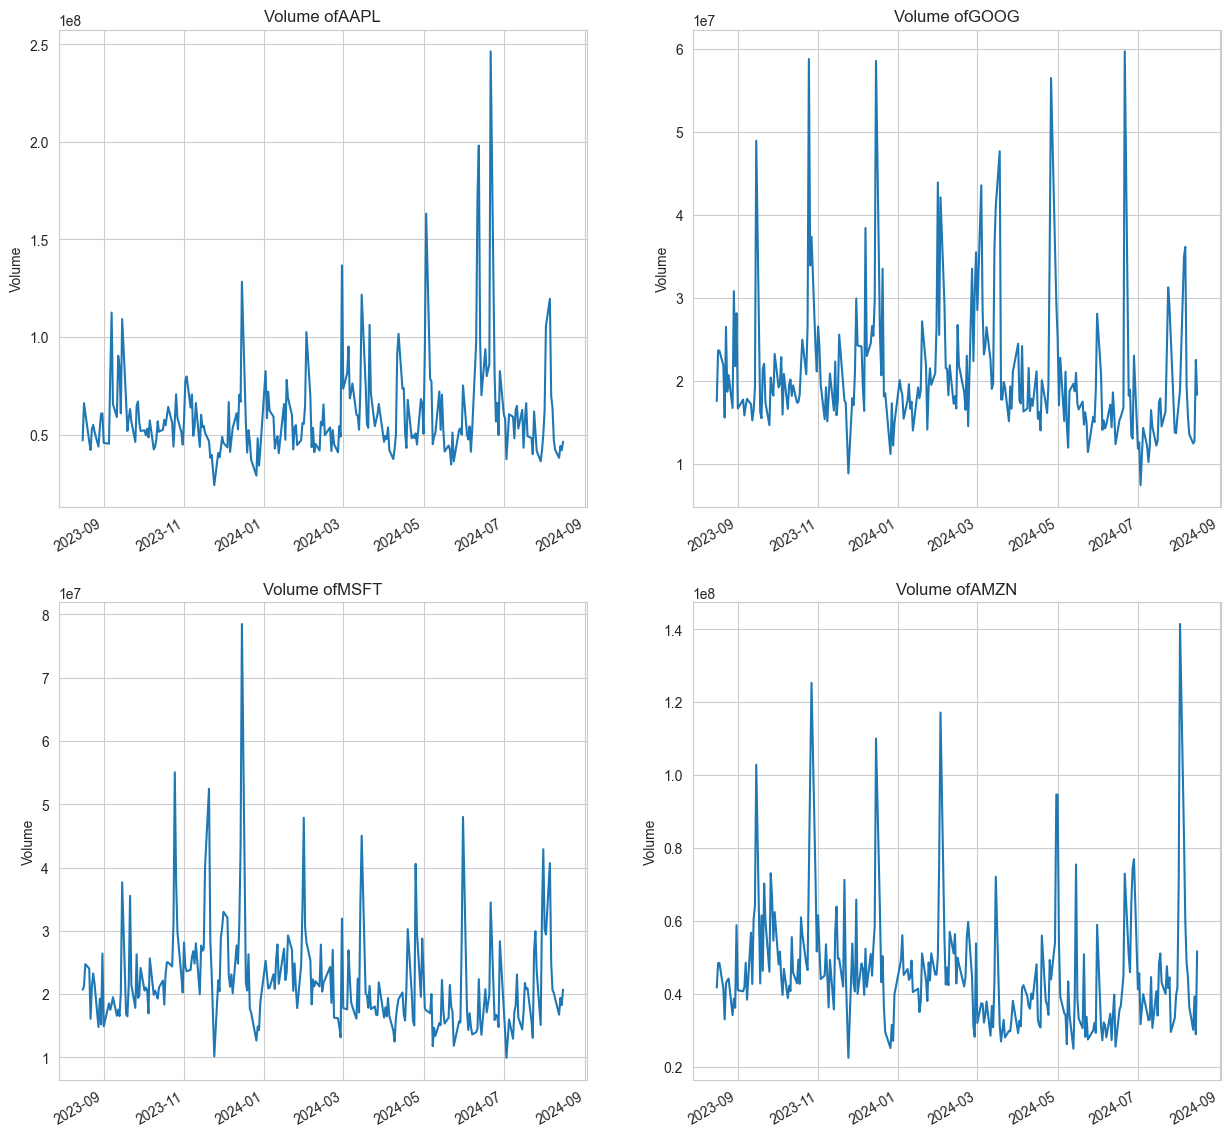

In [15]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom= 1.2)

for i, company in enumerate(company_list,1): #gives: 1 AAPL etc
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of{tech_list[i-1]}")

MOVING AVERAGE

In [ ]:
# we will see the moving average for 10 , 20 , 50 days 

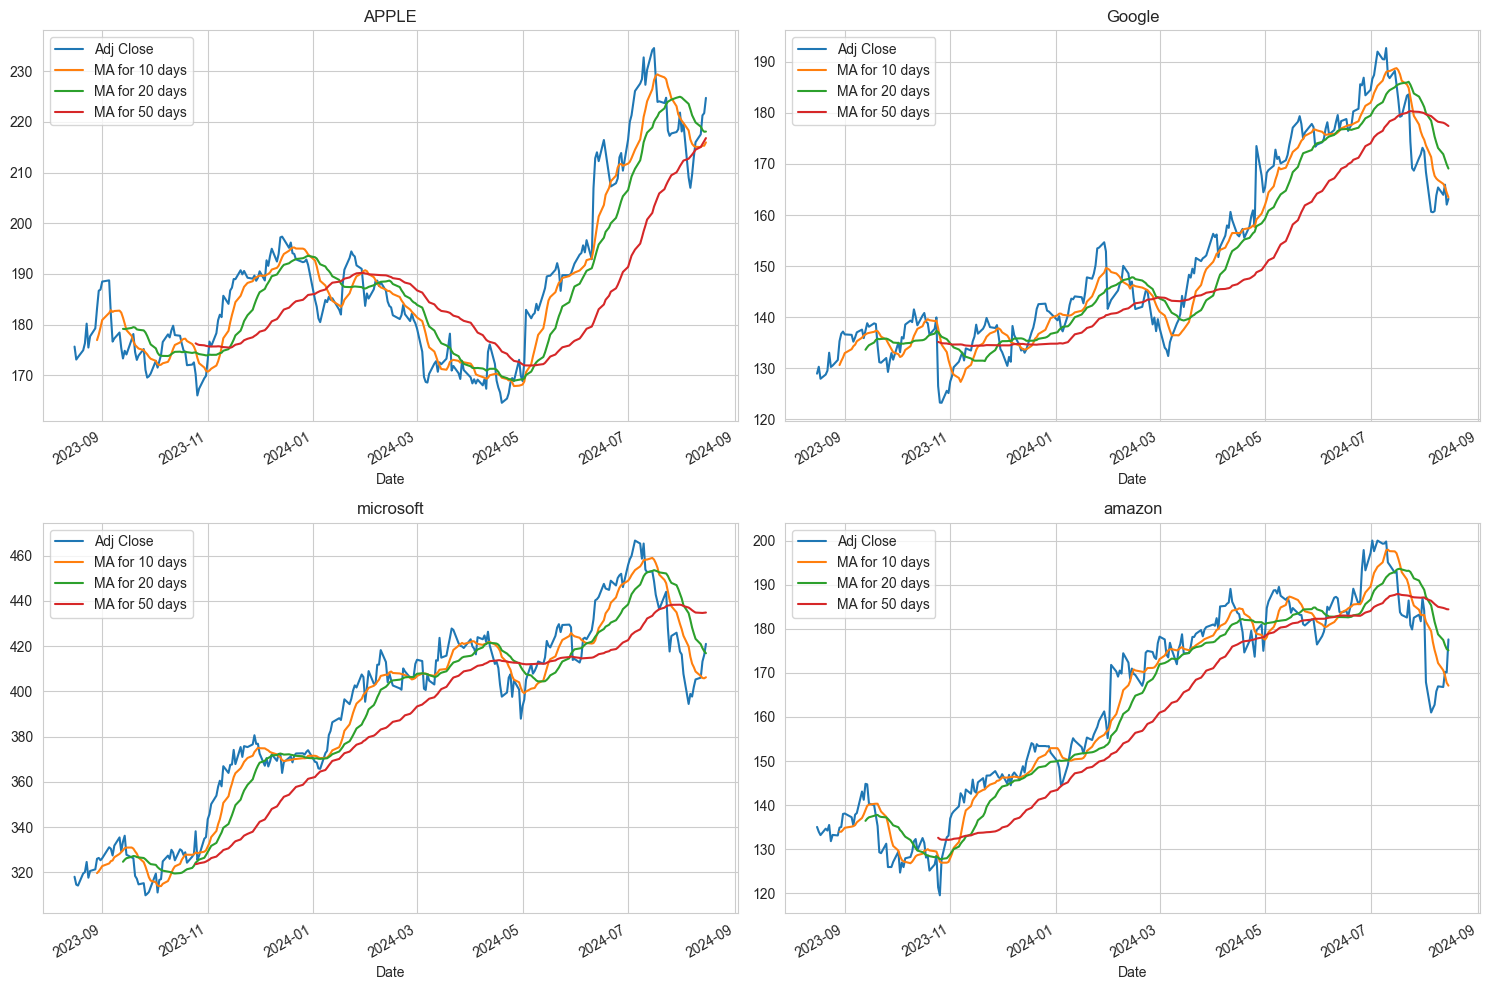

In [16]:
Mavg_day = [10,20,50]


for ma in Mavg_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2,ncols=2)

fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,0],)
axes[0,0].set_title ('APPLE')

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title  ('Google')
MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title ('microsoft')

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('amazon')

fig.tight_layout()

Text(0.5, 1.0, 'apple')

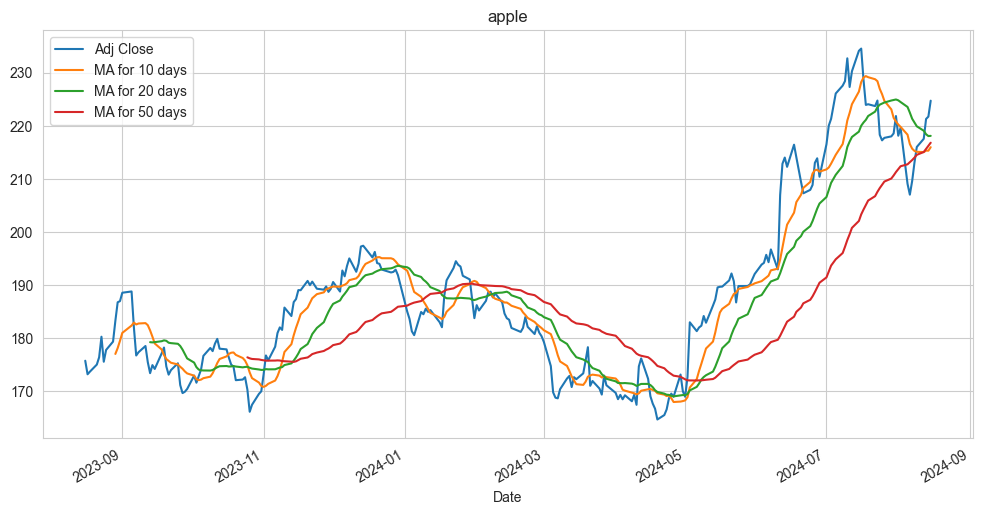

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(12,6))
plt.title('apple')

Daily return analysis

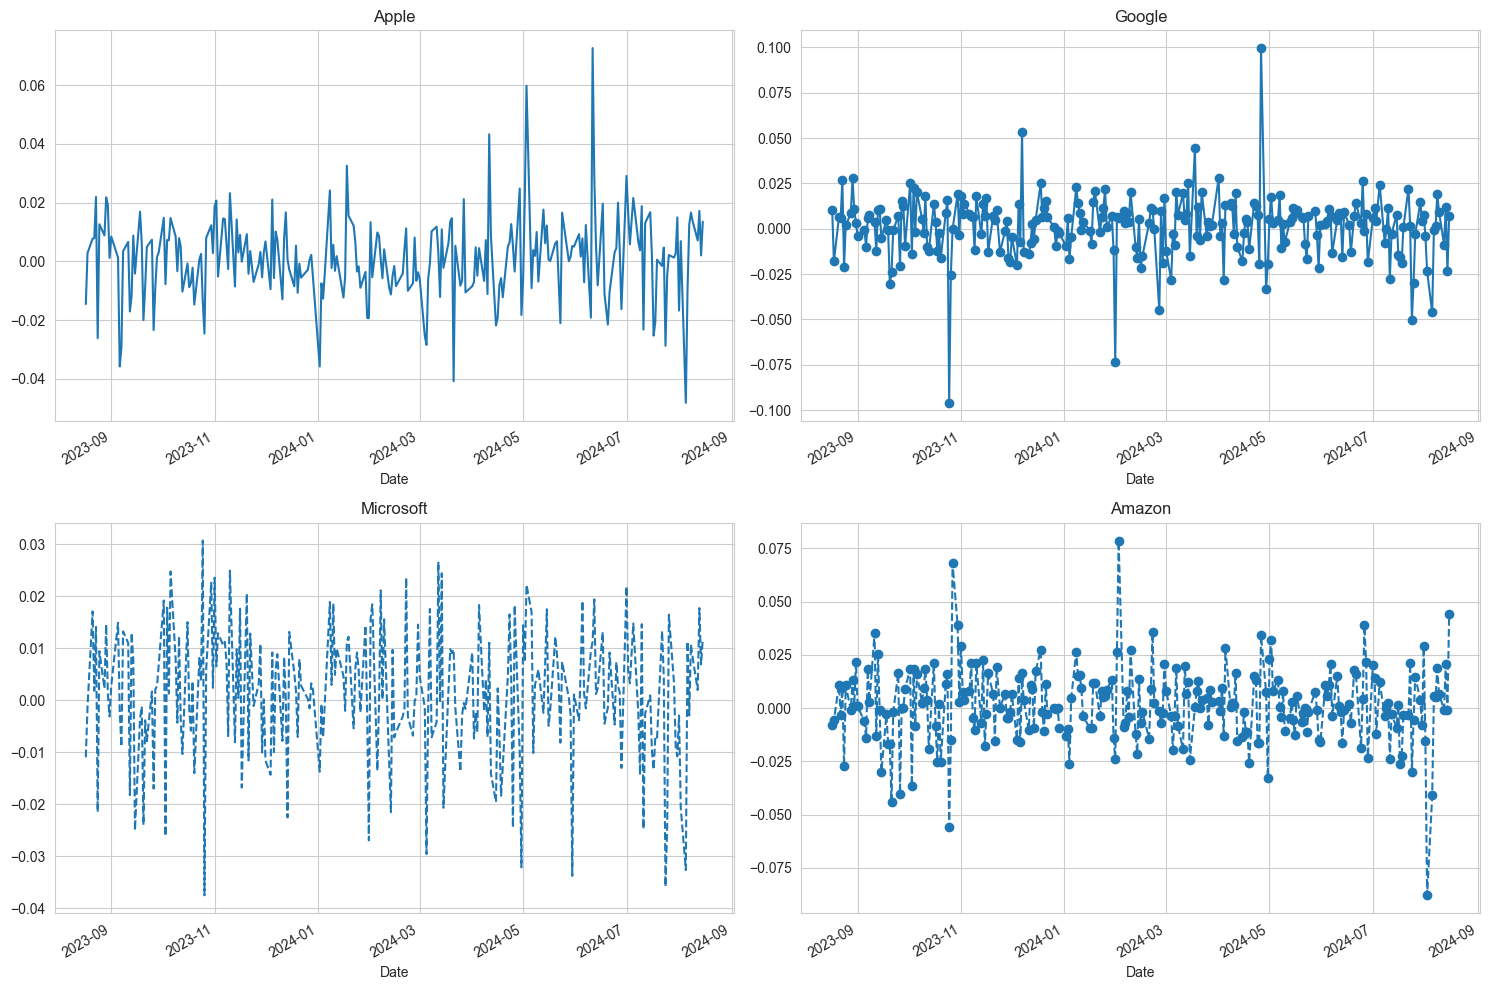

In [18]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    #pct change for percent change for each day
    
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0]) 
axes[0,0].set_title('Apple')
GOOG['Daily Return'].plot(ax=axes[0,1],marker='o') 
axes[0,1].set_title('Google')
MSFT['Daily Return'].plot(ax=axes[1,0],linestyle='--') 
axes[1,0].set_title('Microsoft')
AMZN['Daily Return'].plot(ax=axes[1,1],linestyle='--',marker='o')
axes[1,1].set_title('Amazon')
plt.tight_layout()

0.2, 0.01 etc are close value percent change 

<Axes: xlabel='Date'>

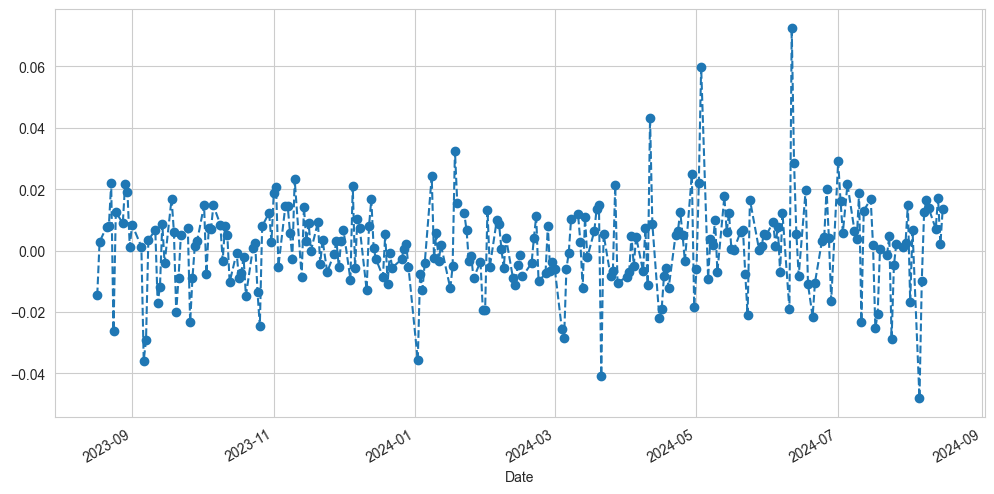

In [19]:
AAPL['Daily Return'].plot(figsize=(12,6),linestyle='--',marker='o')


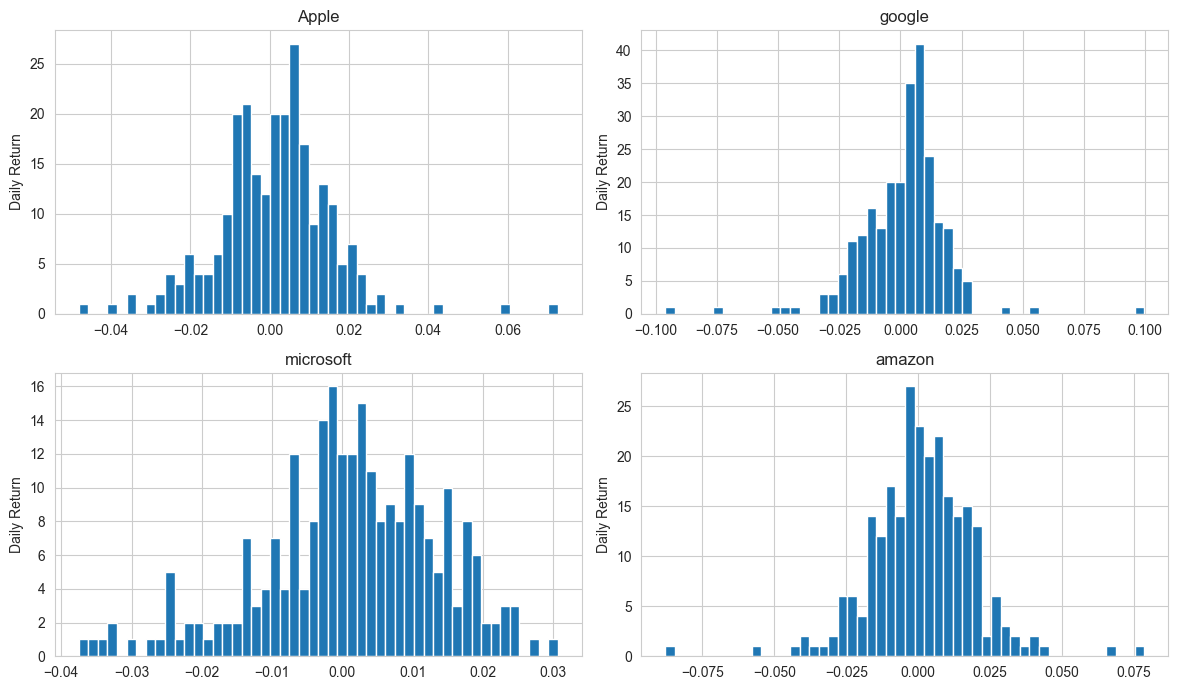

In [20]:
plt.figure(figsize=(12,7)) #plt. should be done before
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()# for best fit

    

pct change vs value of change

correlation between different stocks and closing price 

In [21]:
clossing_df1 = pd.DataFrame(AAPL['Adj Close'])
close1 = clossing_df1.rename(columns={'Adj Close':'apple close'})
clossing_df2 = pd.DataFrame(AMZN['Adj Close'])
close2 = clossing_df2.rename(columns={'Adj Close':'amazon close'})
clossing_df3 = pd.DataFrame(GOOG['Adj Close'])
close3 = clossing_df3.rename(columns={'Adj Close':'google close'})
clossing_df4 = pd.DataFrame(MSFT['Adj Close'])
close4 = clossing_df4.rename(columns={'Adj Close':'microsoft close'})

clossing_df= pd.concat([close1,close4,close3,close2],axis=1)
clossing_df.head()

,apple close,microsoft close,google close,amazon close
Date,,,,
2023-08-16,175.671082,318.012970,128.963242,135.070007
2023-08-17,173.114151,314.519257,130.311722,133.979996
2023-08-18,173.601669,314.122192,127.964386,133.220001
2023-08-21,174.944778,319.481964,128.783447,134.679993
2023-08-22,176.327698,320.057617,129.542587,134.250000


In [22]:
tech_returns = clossing_df.pct_change()
tech_returns.head()

,apple close,microsoft close,google close,amazon close
Date,,,,
2023-08-16,NaN,NaN,NaN,NaN
2023-08-17,-0.014555,-0.010986,0.010456,-0.008070
2023-08-18,0.002816,-0.001262,-0.018013,-0.005672
2023-08-21,0.007737,0.017063,0.006401,0.010959
2023-08-22,0.007905,0.001802,0.005895,-0.003193


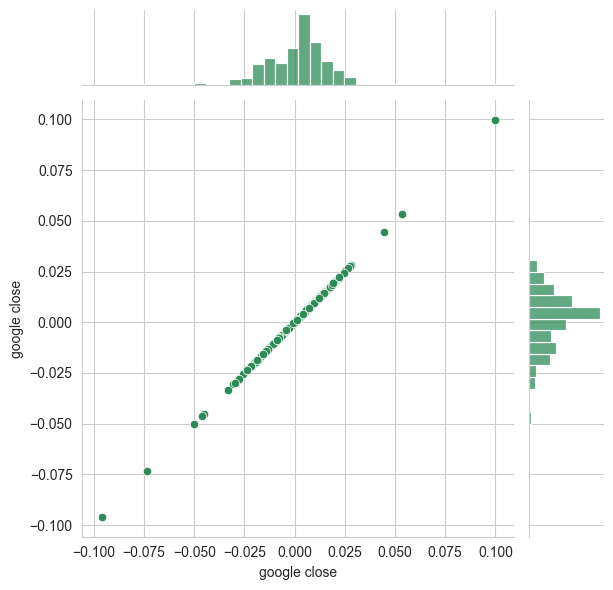

In [23]:
sns.jointplot(tech_returns,x = 'google close',y= 'google close',kind='scatter',color='seagreen')
plt.show()

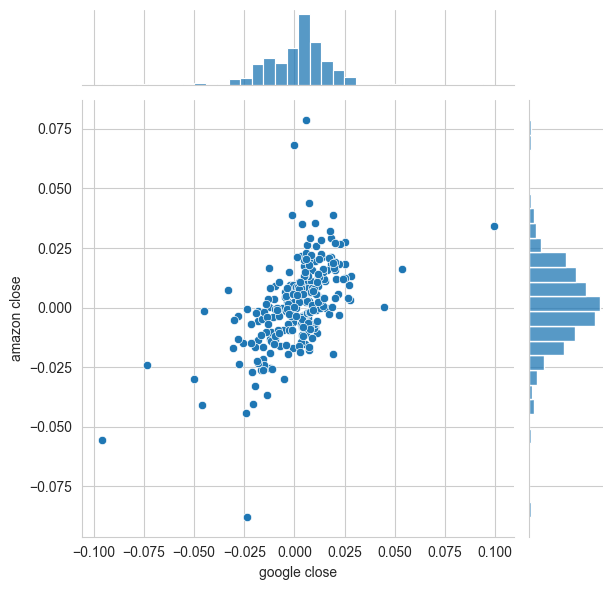

In [24]:
sns.jointplot(tech_returns,x = 'google close',y= 'amazon close',kind='scatter')

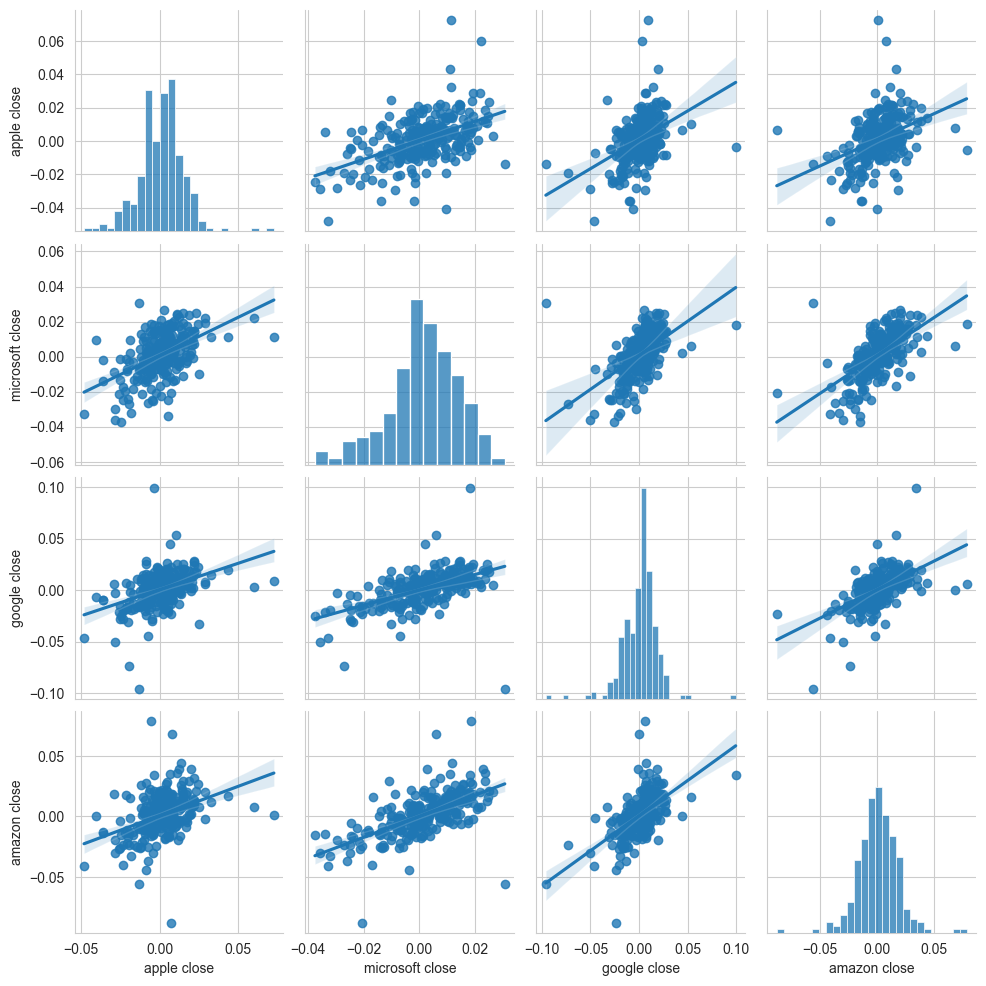

In [25]:
sns.pairplot(tech_returns,kind='reg')


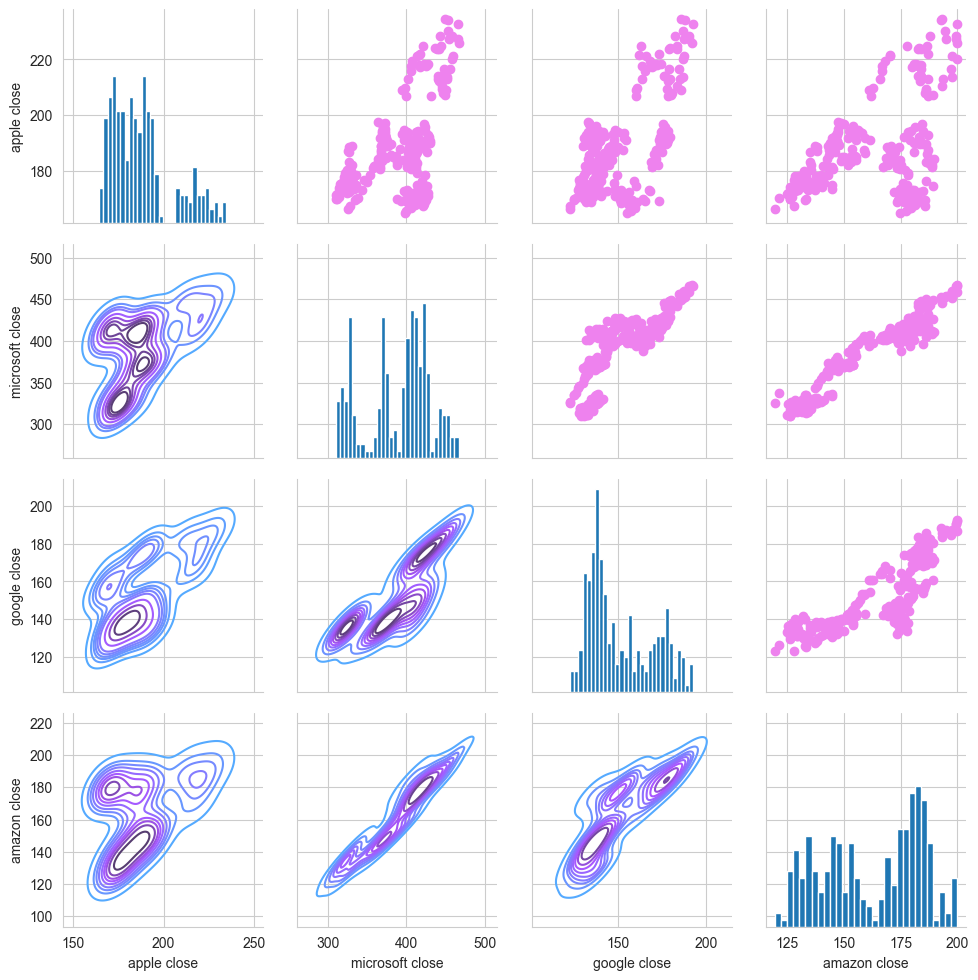

In [26]:
returns_fig = sns.PairGrid(clossing_df)
returns_fig.map_upper(plt.scatter,color='violet')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)
plt.show()

In [27]:
rets=tech_returns.dropna()
tech_returns.isnull().sum()

apple close        1
microsoft close    1
google close       1
amazon close       1
dtype: int64

<Axes: >

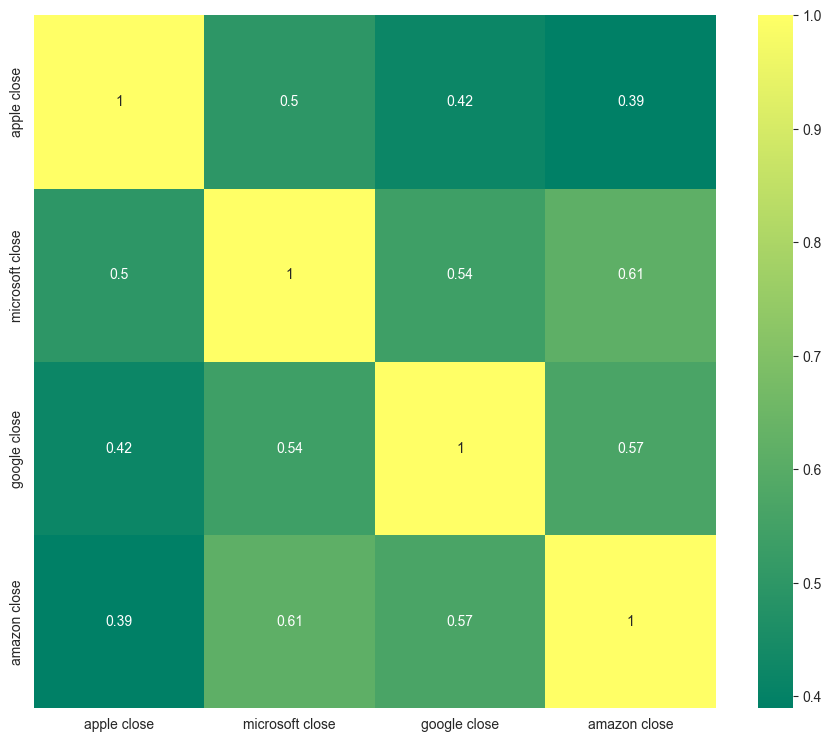

In [28]:
corr = rets.corr()
plt.figure(figsize=(11,9))
sns.heatmap(corr,annot=True,cmap='summer')

Risk analysis


AttributeError: 'DataFrame' object has no attribute 'colomns'

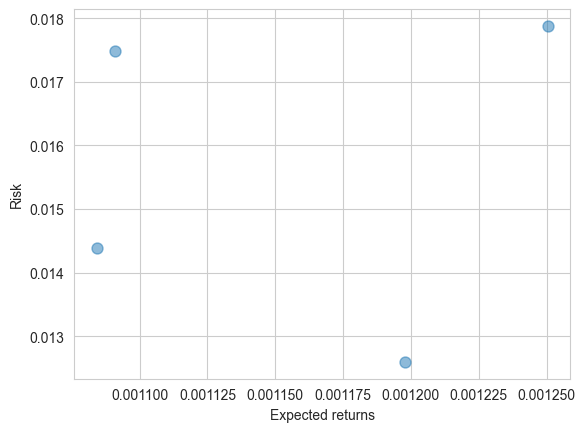

In [29]:
rets=tech_returns

area= np.pi*20
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.colomns, rets.meam(),rets.std()):
    plt.annotate(label,xy=(x,y),xytest=(50,50),textcoords='offset points',ha ='right',va='bottom',arrowprops=dict(arrowstyle='-',color='red',connectionstyle='arc3,rad=-0.3'))

Value at risk

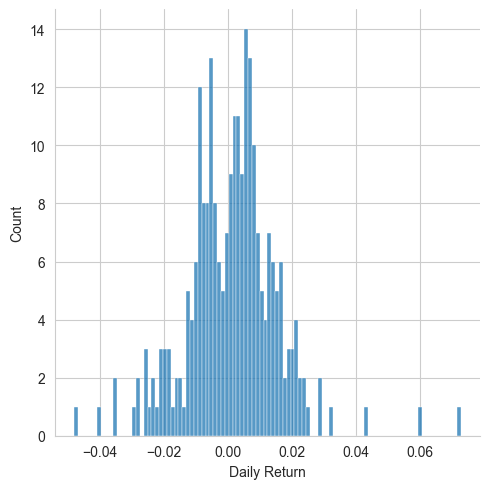

In [30]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100)
plt.show()

In [31]:
rets.head(99999999999999999999)

,apple close,microsoft close,google close,amazon close
Date,,,,
2023-08-16,NaN,NaN,NaN,NaN
2023-08-17,-0.014555,-0.010986,0.010456,-0.008070
2023-08-18,0.002816,-0.001262,-0.018013,-0.005672
2023-08-21,0.007737,0.017063,0.006401,0.010959
2023-08-22,0.007905,0.001802,0.005895,-0.003193
...,...,...,...,...
2024-08-09,0.013736,0.008269,0.009460,0.006876
2024-08-12,0.007130,0.001946,-0.008707,-0.000839
2024-08-13,0.017193,0.017699,0.012077,0.020564


In [32]:
emp = rets['apple close'].quantile(0.05)
print('The 0.05 empirical quantile of daily returns is at',emp)

The 0.05 empirical quantile of daily returns is at -0.022542191355096275


## MODEL BUILDING

we will solve it Using LSTM

### Strategy

DATA we use :
    scaled data(dataset after minmax-scaling), dataset 
we use scaled data in x_train , y_train and x_test and 

we will predict the scaled version of y_test(pred) and use inverse scaler to remove scaling, then we will compare those predictions with y_test (true values) .

SPLIT:

let x be 95% of data set (we split train test in 95:05 ratio)
x_train -> 0 to x of scaled data
y_train -> 0 to x of scaled data 
x_ test -> x to : of scaled data
y_test -> x to : of dataset

Train and test data:

as we are use a single  numpy array , we use data of last 60 days to predict today. 
so (today-60 days to yesterday) data to predict today value.

In [33]:
df=yf.download('AAPL',start='2012-01-01',end=datetime.now())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402625,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469283,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607718,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400


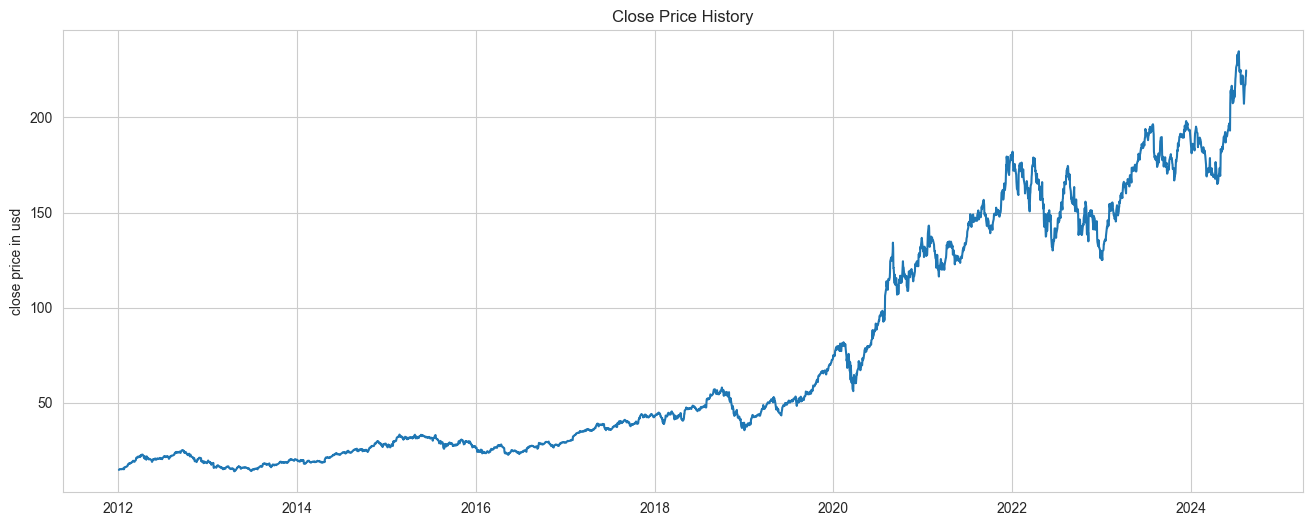

In [34]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.ylabel('close price in usd')
plt.show()

In [35]:
data = df.filter(['Close'])
# turn them to numpy
dataset = data.values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.93865238],
       [0.94068974],
       [0.95427223]])

Creating a model

In [48]:
x= int(np.ceil(len(dataset)*0.95))
x

3017

In [49]:
trained_data = scaled_data[0:int(x),:]
x_train=[]
y_train=[]

In [50]:
for i in range(60,x):
    x_train.append(trained_data[i-60:i,0])
    y_train.append(trained_data[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

trained_data[i-60:i,0] meaning : trained data array from i-60 days to i in index 0, i.e it will contain 59(values at/in range i-60 to i) values and using them it will predict the value at i.

59 values in train data set --> maps to 1 value at test data set 

In [38]:
import tensorflow as tf
from tensorflow.keras import models

In [39]:
from keras.models import Sequential

In [40]:
from keras.layers import Dense, LSTM

In [51]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

C:\Users\cheru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.fit(x_train,y_train)

93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0124


In [54]:
test_data = scaled_data[x-60:,:]
x_test = []
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
y_test=dataset[x:,:]

x_test = np.array(x_test)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rsme = np.sqrt(np.mean(((predictions-y_test)**2)))
rsme

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


9.18943761562494

C:\Users\cheru\AppData\Local\Temp\ipykernel_34180\2709573519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


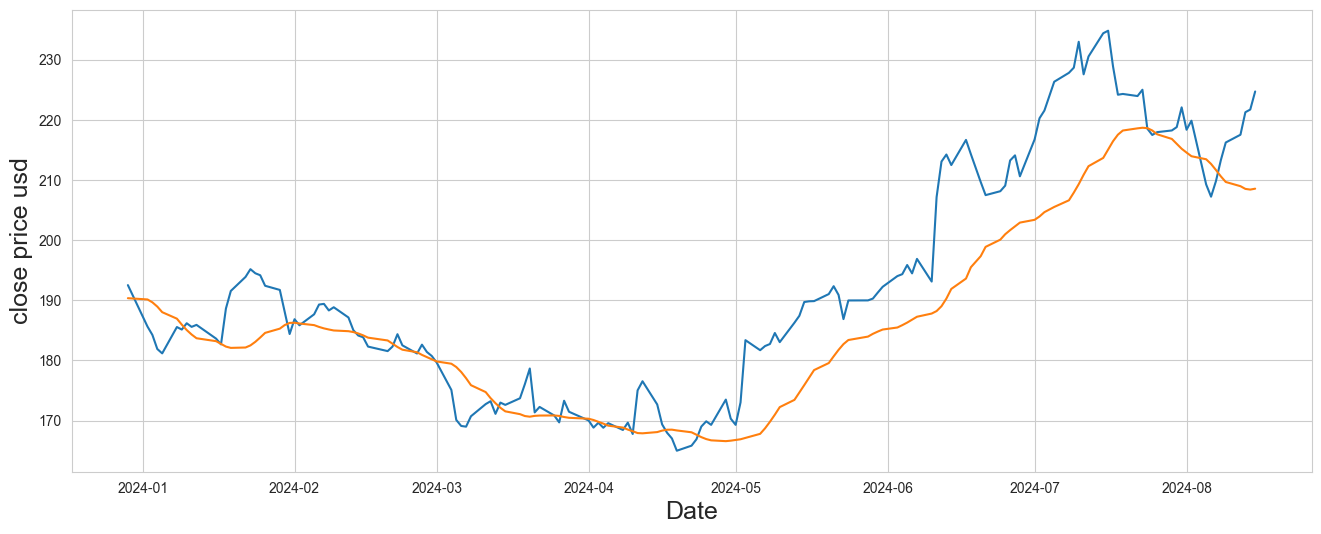

In [56]:
train = data[:x]
valid = data[x:]
valid['predictions'] = predictions

plt.figure(figsize=(16,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price usd',fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.show()